# **Retrieval with k-NN**

In [2]:
import sys

sys.path.insert(0, "..\\Scripts")

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

## **Load dataset**

In [3]:
base_feature_path = '../Features/features/'
base_labels_path = '../Features/labels/'

### **Load train small dataset**


In [4]:
feat_small = np.load(base_feature_path + 'x_train.npy')
labs_small = np.load(base_labels_path + 'y_train.npy')

In [5]:
df_small = pd.read_csv('../Dataset/train_augmented_3.csv', header=None)
df_small.head()

,0,1
0,train_059371.jpg,0
1,train_059791.jpg,0
2,train_059792.jpg,0
3,train_059796.jpg,0
4,train_059798.jpg,0


### **Load unlabelled dataset**

In [6]:
feat_unlabelled = np.load(base_feature_path + 'mobilenet_v3_classifier_unlabelled.npy')

In [7]:
df_unlabelled = pd.read_csv('../Dataset/train_unlabeled.csv', header=None)
df_unlabelled.head()

,0,1
0,train_059329.jpg,-1
1,train_059330.jpg,-1
2,train_059331.jpg,-1
3,train_059332.jpg,-1
4,train_059333.jpg,-1


### **Analyze dataset**

In [13]:
df = pd.read_csv('../Dataset/train_augmented_3.csv', header=None)
df.columns = ['Image', 'Label']
df.head()

,Image,Label
0,train_059371.jpg,0
1,train_059791.jpg,0
2,train_059792.jpg,0
3,train_059796.jpg,0
4,train_059798.jpg,0


In [18]:
df['Label'].nunique()

251

In [ ]:
for _class in range(df['Label'].nunique()):
    print(f"Class {_class}")
    n_image_in_class = len(df[df['Label'] == _class])
    if n_image_in_class < 100:
        if n_image_in_class < 50:
            print(f"Class {_class} has less than 50 samples, augmenting it with kNN single image")
            neigh = NearestNeighbors(n_neighbors=10, n_jobs=-1, metric='cosine')
            neigh.fit(feat_small[labs_small == _class])

            distances, indices = neigh.kneighbors(feat_unlabelled)
        else:
            print(f"Class {_class} has less than 100 samples, augmenting it with kNN multiple images")
    

print("Done")
distances, indices
        

Class 0
Done


NameError: name 'distances' is not defined

## **Retrieval with k-NN**

In [7]:
from ImageRetrieval import KNNRetrieval

In [8]:
retrieval = KNNRetrieval(feat_small, labs_small, k=10)

In [9]:
augmented_labels = retrieval.retrieve_images(feat_unlabelled)

113455it [00:04, 25914.91it/s]


## **Save Results**

In [10]:
df_results = df_small.copy()
df_results.columns = ["Image", "Label"]
df_results.head()

,Image,Label
0,train_059371.jpg,0
1,train_059389.jpg,0
2,train_059425.jpg,0
3,train_059445.jpg,0
4,train_059516.jpg,0


In [11]:
tmp = pd.DataFrame({"Image": df_unlabelled[0], "Label": augmented_labels})
tmp = tmp[tmp["Label"] != -1]
tmp.head()

,Image,Label
1,train_059330.jpg,21
2,train_059331.jpg,21
3,train_059332.jpg,0
7,train_059336.jpg,0
9,train_059338.jpg,0


In [12]:
df_results = pd.concat([df_results, tmp])
df_results.sort_values(by="Label", inplace=True)
df_results.reset_index(drop=True, inplace=True)
df_results.head()

,Image,Label
0,train_059371.jpg,0
1,train_059687.jpg,0
2,train_059685.jpg,0
3,train_059683.jpg,0
4,train_059682.jpg,0


In [13]:
df_results.to_csv("../Dataset/train_augmented_3_new.csv", header=False, index=False)

## **How the number of labels has changed**

In [14]:
import seaborn as sns
sns.set_style("dark")

In [15]:
df_small.columns = ["Image", "Label"]

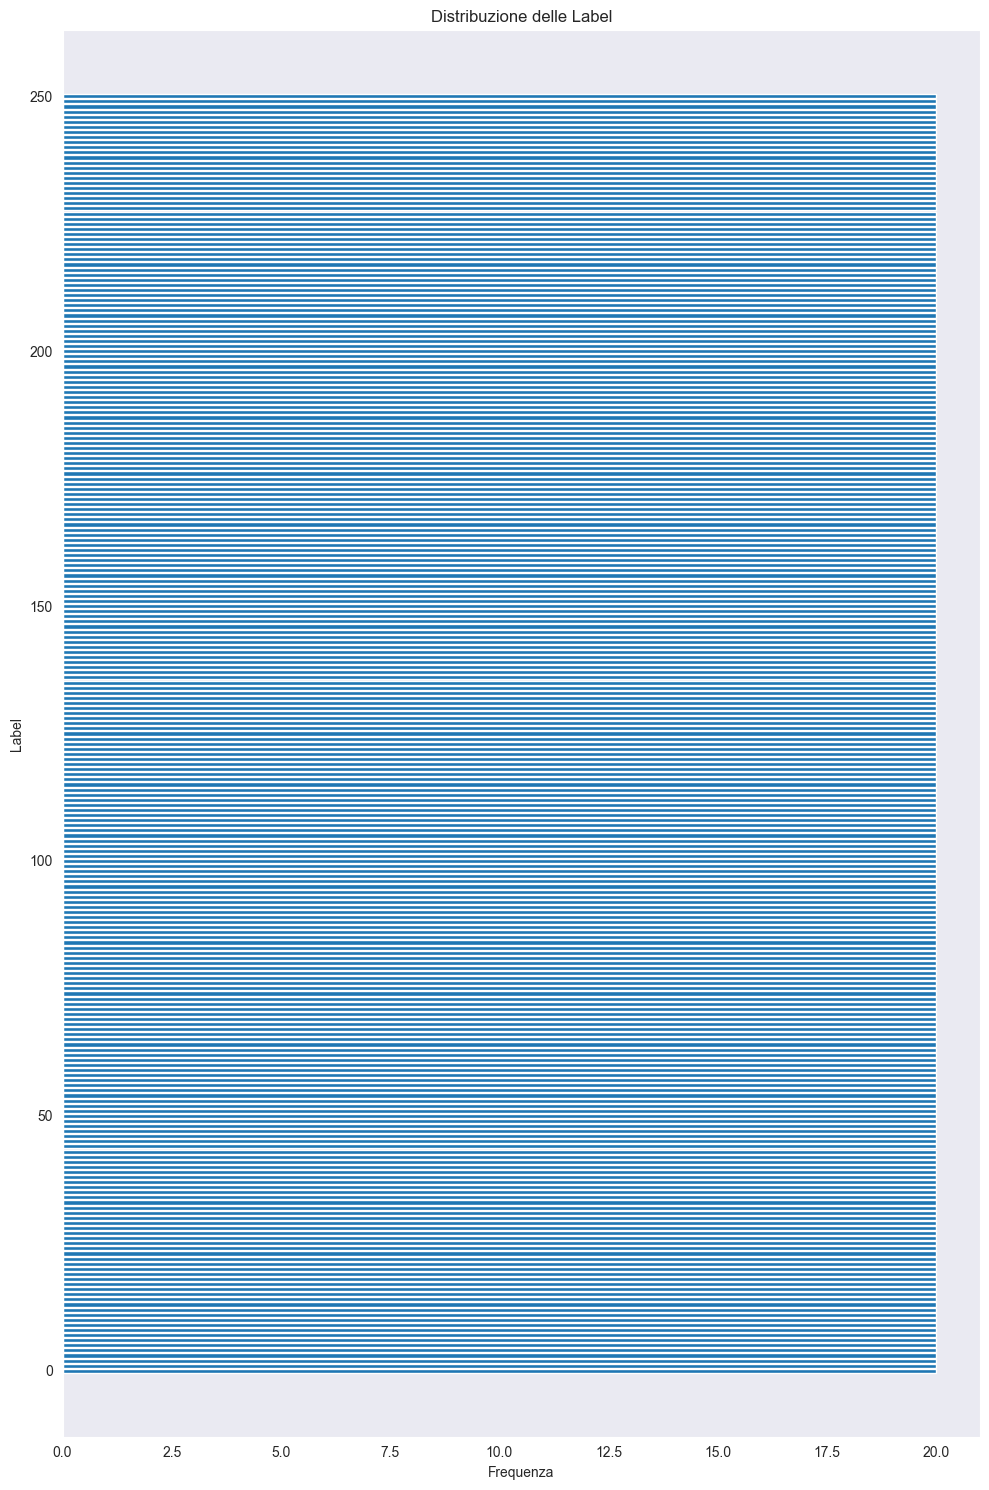

In [16]:
plt.figure(figsize=(10, 15))
label_counts = df_small['Label'].value_counts()
plt.barh(label_counts.index, label_counts.values)
plt.xlabel('Frequenza')
plt.ylabel('Label')
plt.title('Distribuzione delle Label')
plt.tight_layout()
plt.show()

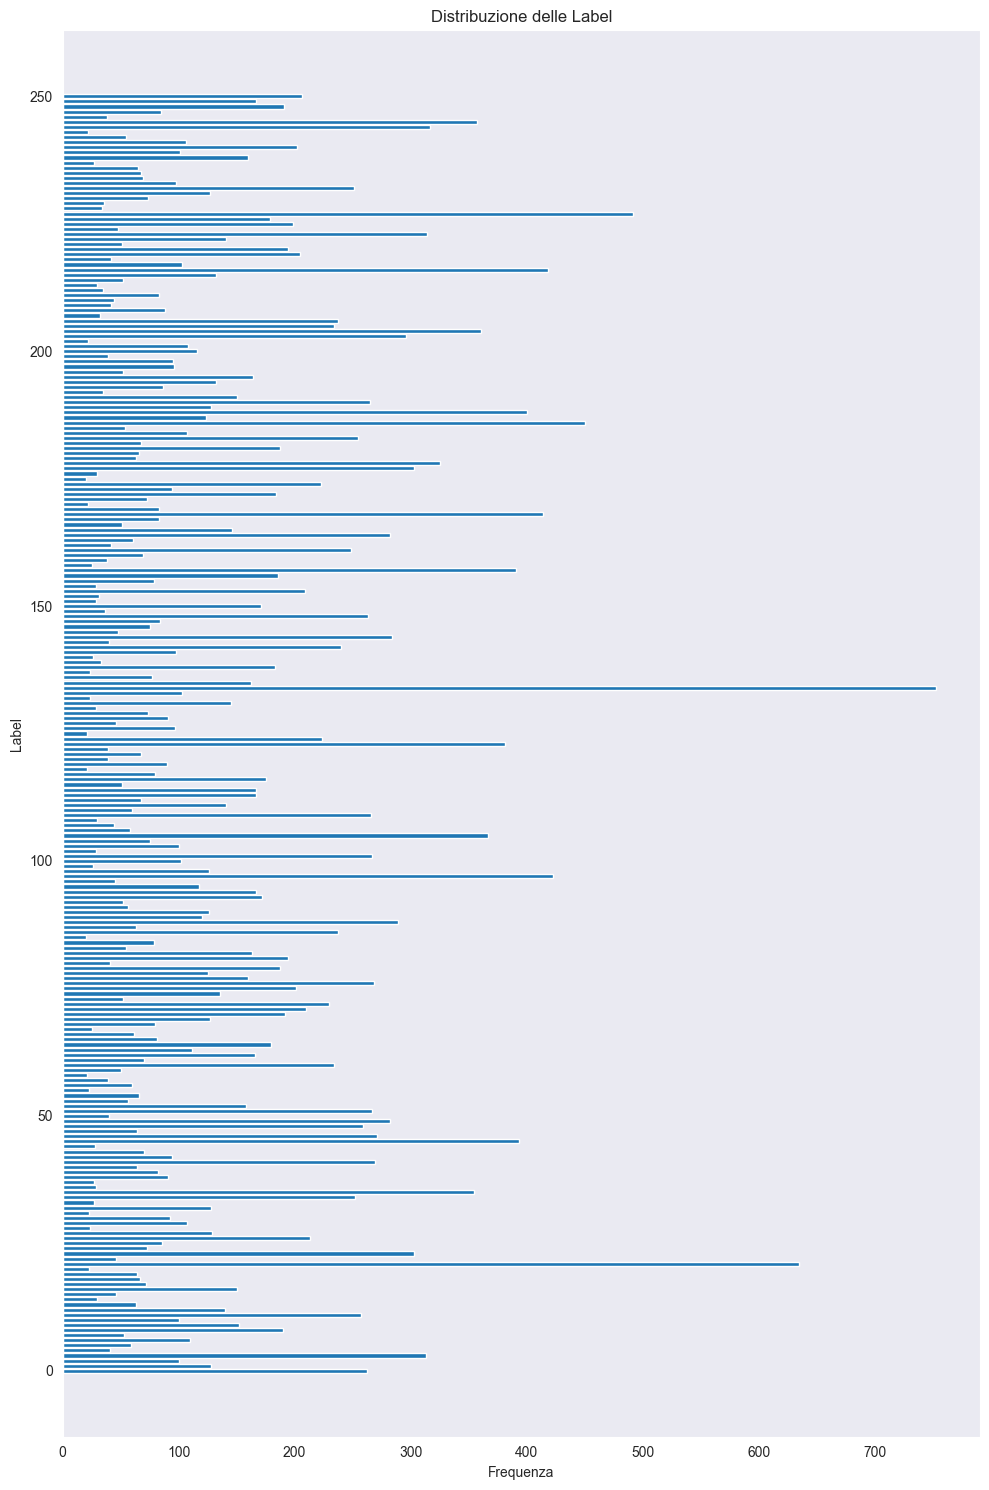

In [17]:
plt.figure(figsize=(10, 15))
label_counts = df_results['Label'].value_counts()
plt.barh(label_counts.index, label_counts.values)
plt.xlabel('Frequenza')
plt.ylabel('Label')
plt.title('Distribuzione delle Label')
plt.tight_layout()
plt.show()